C:\Users\User\AppData\Local\Temp\ipykernel_28724\2856637202.py:18: UserWarning: Converting to PeriodArray/Index representation will drop timezone information.
  df['cohort'] = df['created_at'].dt.to_period('M')


Descripción de los datos:
                  id  cash_request_id             type    status  \
count   21061.000000     21057.000000            21061     21061   
unique           NaN              NaN                3         4   
top              NaN              NaN  instant_payment  accepted   
freq             NaN              NaN            11099     14841   
mean    10645.355111     16318.449162              NaN       NaN   
min         1.000000      1456.000000              NaN       NaN   
25%      5385.000000     11745.000000              NaN       NaN   
50%     10652.000000     17160.000000              NaN       NaN   
75%     15925.000000     21796.000000              NaN       NaN   
max     21193.000000     27010.000000              NaN       NaN   
std      6099.315256      6656.149949              NaN       NaN   

                     category  total_amount                 reason  \
count                    2196  21061.000000                  21061   
unique           

C:\Users\User\AppData\Local\Temp\ipykernel_28724\2856637202.py:29: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette='viridis')


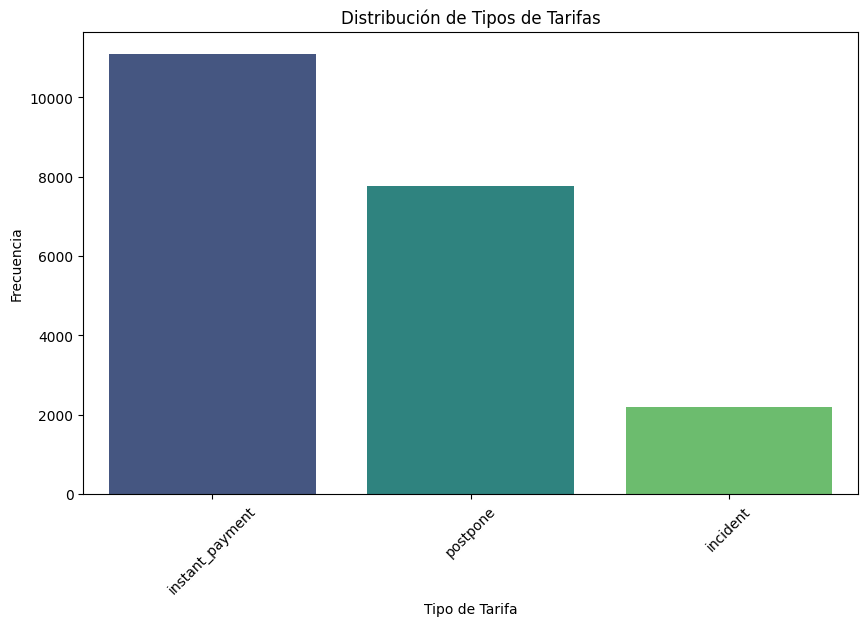

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv("../dataset/extract-fees-data-analyst.csv")

# --- PREPROCESAMIENTO DE DATOS ---
# Convertir columnas de fecha a tipo datetime
date_columns = ['created_at', 'updated_at', 'paid_at', 'from_date', 'to_date']
for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')

# Asegurar que 'total_amount' sea numérico
df['total_amount'] = pd.to_numeric(df['total_amount'], errors='coerce')

# Crear columna 'cohort' con el mes/año de creación del fee
df['cohort'] = df['created_at'].dt.to_period('M')

# --- ANÁLISIS EXPLORATORIO DE DATOS (EDA) ---
# Descripción inicial del conjunto de datos
print("Descripción de los datos:")
print(df.describe(include='all'))
print("\nValores nulos:")
print(df.isnull().sum())

# Visualización de los tipos de tarifas
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='type', order=df['type'].value_counts().index, palette='viridis')
plt.title("Distribución de Tipos de Tarifas")
plt.xlabel("Tipo de Tarifa")
plt.ylabel("Frecuencia")
plt.xticks(rotation=45)
plt.show()


# Métricas Iniciales para el Proyecto
Las métricas iniciales a calcular y analizar para comenzar el proyecto son las siguientes:

## Frecuencia de Uso del Servicio:
Analizar con qué frecuencia los usuarios de cada cohorte utilizan los servicios de adelanto de efectivo de Business Payments a lo largo del tiempo.

## Tasa de Incidentes: 
Determinar la tasa de incidentes, especialmente aquellos relacionados con problemas de pago, en cada cohorte. Identificar variaciones significativas entre cohortes.

## Ingresos Generados por Cohorte: 
Calcular el total de ingresos generados por cada cohorte a lo largo del tiempo para evaluar el impacto financiero del comportamiento de los usuarios.

## Métricas Acumuladas por Cohorte: 
Proponer y calcular métricas acumuladas que proporcionen perspectivas adicionales para la extracción de insights accionables.

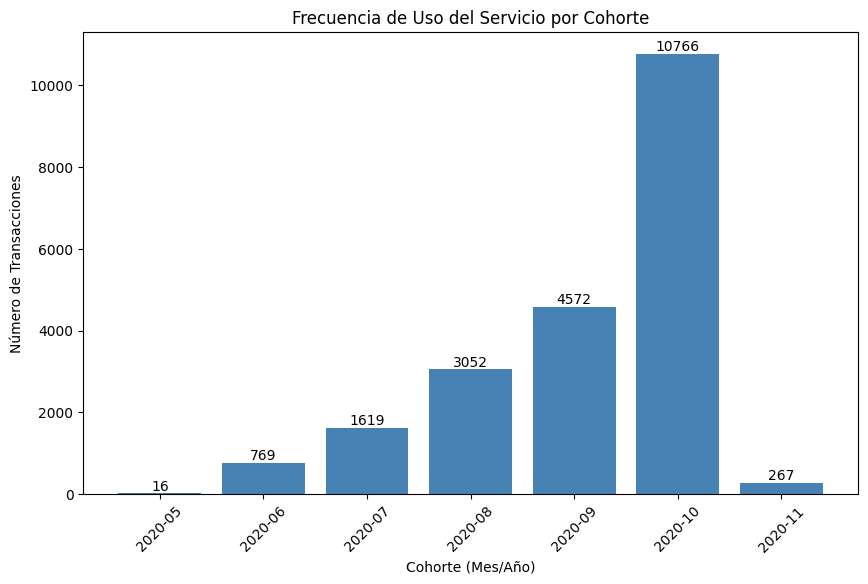

posx and posy should be finite values
posx and posy should be finite values


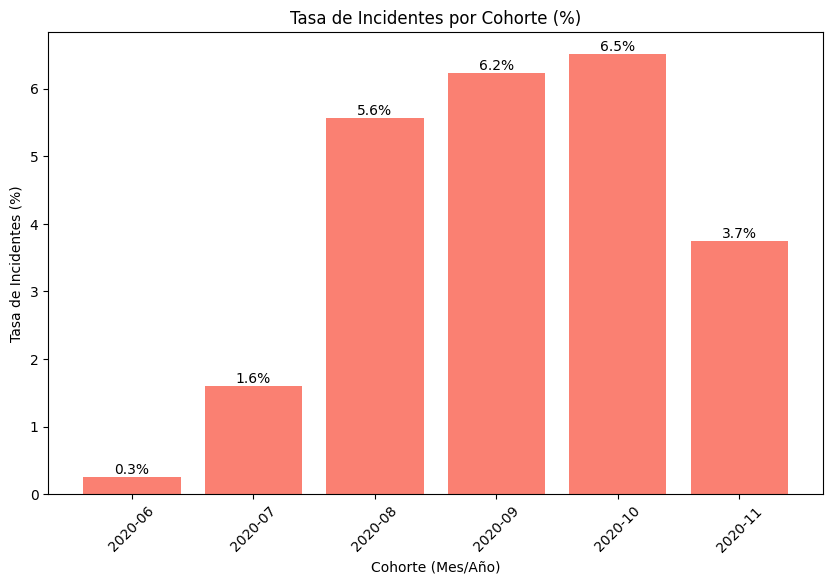

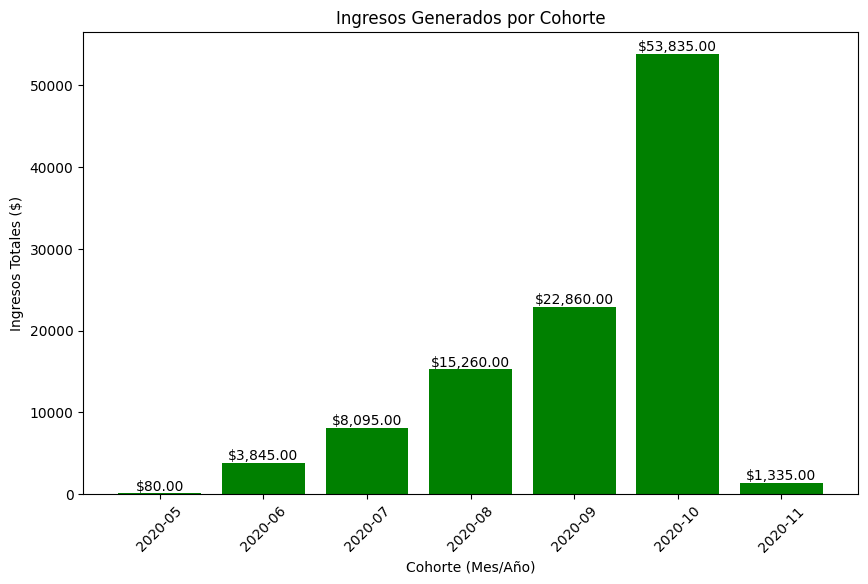

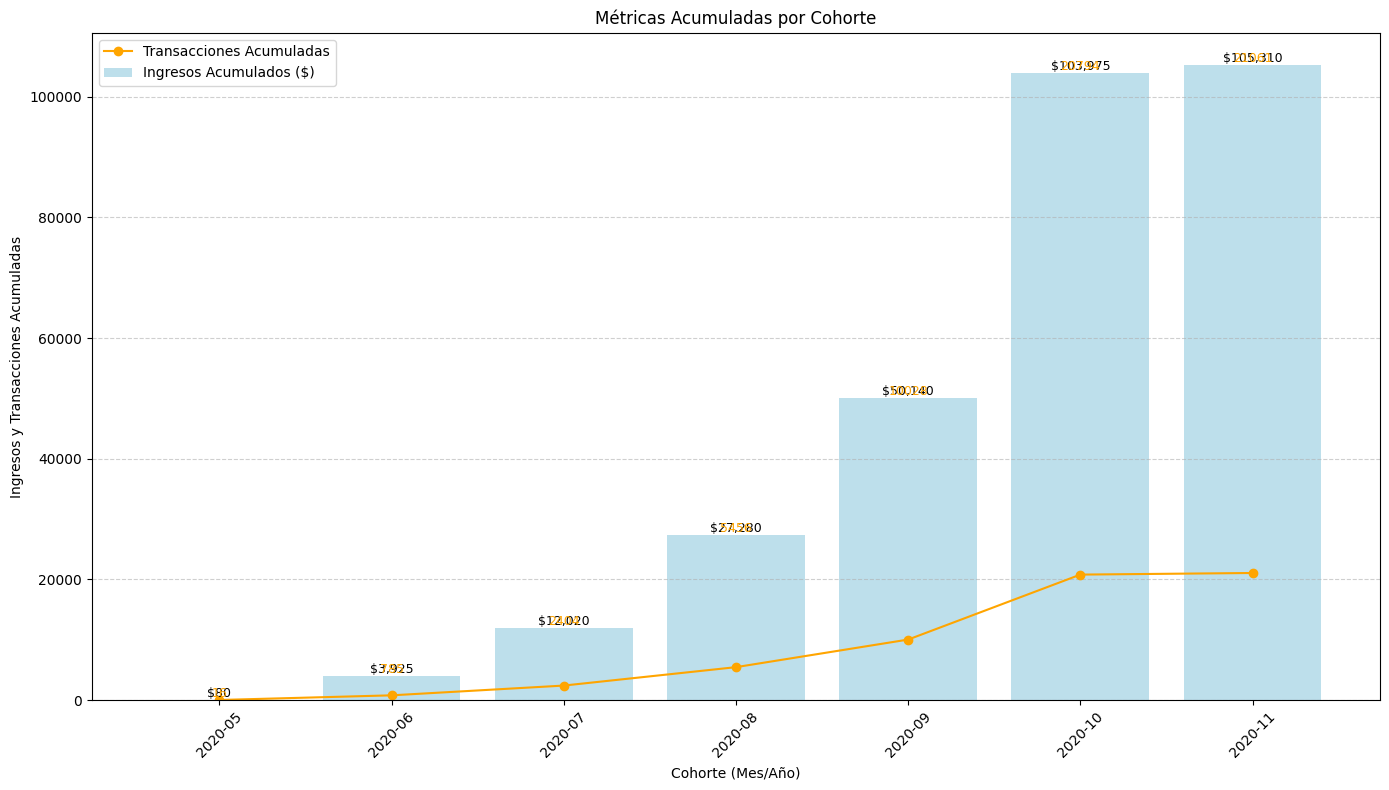


INSIGHTS RELEVANTES:
- Cohorte con mayor frecuencia de uso: 2020-10 (10766 transacciones)
- Cohorte con mayor tasa de incidentes: 2020-10 (6.51%)
- Cohorte con mayores ingresos: 2020-10 ($53,835.00)
- Total de ingresos acumulados: $105,310.00


In [ ]:
## 1. Frecuencia de Uso del Servicio
usage_frequency = df.groupby('cohort')['id'].count()

plt.figure(figsize=(10, 6))
bars = plt.bar(usage_frequency.index.astype(str), usage_frequency, color='steelblue')
plt.title("Frecuencia de Uso del Servicio por Cohorte")
plt.xlabel("Cohorte (Mes/Año)")
plt.ylabel("Número de Transacciones")
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}', ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45)
plt.show()

## 2. Tasa de Incidentes
# Filtrar transacciones con incidentes
incident_data = df[df['status'] == 'rejected']
incident_rate = incident_data.groupby('cohort')['id'].count() / df.groupby('cohort')['id'].count()

plt.figure(figsize=(10, 6))
bars = plt.bar(incident_rate.index.astype(str), incident_rate * 100, color='salmon')
plt.title("Tasa de Incidentes por Cohorte (%)")
plt.xlabel("Cohorte (Mes/Año)")
plt.ylabel("Tasa de Incidentes (%)")
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{height:.1f}%', ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45)
plt.show()

## 3. Ingresos Generados por Cohorte
revenue_by_cohort = df.groupby('cohort')['total_amount'].sum()

plt.figure(figsize=(10, 6))
bars = plt.bar(revenue_by_cohort.index.astype(str), revenue_by_cohort, color='green')
plt.title("Ingresos Generados por Cohorte")
plt.xlabel("Cohorte (Mes/Año)")
plt.ylabel("Ingresos Totales ($)")
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'${height:,.2f}', ha='center', va='bottom', fontsize=10)
plt.xticks(rotation=45)
plt.show()

## 4. Métricas Acumuladas por Cohorte

# Ingresos acumulados
cumulative_revenue = revenue_by_cohort.cumsum()

# Transacciones acumuladas
transactions_by_cohort = df.groupby('cohort')['id'].count()
cumulative_transactions = transactions_by_cohort.cumsum()

# Combinar métricas acumuladas en un DataFrame
metrics_df = pd.DataFrame({
    'Total Revenue': revenue_by_cohort,
    'Cumulative Revenue': cumulative_revenue,
    'Cumulative Transactions': cumulative_transactions
})

# Muestro las Métricas Acumuladas
plt.figure(figsize=(14, 8))
bars = plt.bar(metrics_df.index.astype(str), metrics_df['Cumulative Revenue'], color='lightblue', alpha=0.8, label='Ingresos Acumulados ($)')
plt.plot(metrics_df.index.astype(str), metrics_df['Cumulative Transactions'], color='orange', marker='o', label='Transacciones Acumuladas')

# Muestro valores sobre las barras y línea
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'${height:,.0f}', ha='center', va='bottom', fontsize=9)

for i, val in enumerate(metrics_df['Cumulative Transactions']):
    plt.text(i, metrics_df['Cumulative Revenue'].iloc[i], f'{int(val)}', color='orange', ha='center', va='bottom', fontsize=9)

plt.title("Métricas Acumuladas por Cohorte")
plt.xlabel("Cohorte (Mes/Año)")
plt.ylabel("Ingresos y Transacciones Acumuladas")
plt.xticks(rotation=45)
plt.legend(loc='upper left')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Resumen de los insights
print("\nINSIGHTS RELEVANTES:")
print(f"- Cohorte con mayor frecuencia de uso: {usage_frequency.idxmax()} ({usage_frequency.max()} transacciones)")
print(f"- Cohorte con mayor tasa de incidentes: {incident_rate.idxmax()} ({incident_rate.max() * 100:.2f}%)")
print(f"- Cohorte con mayores ingresos: {revenue_by_cohort.idxmax()} (${revenue_by_cohort.max():,.2f})")
print(f"- Total de ingresos acumulados: ${cumulative_revenue.max():,.2f}") #ERROR  REVISAR